In [1]:
import warnings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
import sklearn 
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/AIML-B2/main/data.csv")
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df1.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
df1.shape

(569, 33)

In [7]:
df1.size

18777

In [8]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
df1.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [12]:
df1.value_counts()

Series([], dtype: int64)

In [13]:
df1.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
df1['area_mean']

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64

In [15]:
df1['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [16]:
df1['area_worst']

0      2019.0
1      1956.0
2      1709.0
3       567.7
4      1575.0
        ...  
564    2027.0
565    1731.0
566    1124.0
567    1821.0
568     268.6
Name: area_worst, Length: 569, dtype: float64

In [17]:
df1['compactness_se']

0      0.04904
1      0.01308
2      0.04006
3      0.07458
4      0.02461
        ...   
564    0.02891
565    0.02423
566    0.03731
567    0.06158
568    0.00466
Name: compactness_se, Length: 569, dtype: float64

In [18]:
df1['concave points_se']

0      0.01587
1      0.01340
2      0.02058
3      0.01867
4      0.01885
        ...   
564    0.02454
565    0.01678
566    0.01557
567    0.01664
568    0.00000
Name: concave points_se, Length: 569, dtype: float64

In [19]:
df1['fractal_dimension_mean']

0      0.07871
1      0.05667
2      0.05999
3      0.09744
4      0.05883
        ...   
564    0.05623
565    0.05533
566    0.05648
567    0.07016
568    0.05884
Name: fractal_dimension_mean, Length: 569, dtype: float64

In [20]:
df1['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [21]:
df1['fractal_dimension_worst']

0      0.11890
1      0.08902
2      0.08758
3      0.17300
4      0.07678
        ...   
564    0.07115
565    0.06637
566    0.07820
567    0.12400
568    0.07039
Name: fractal_dimension_worst, Length: 569, dtype: float64

In [22]:
df1['id']

0        842302
1        842517
2      84300903
3      84348301
4      84358402
         ...   
564      926424
565      926682
566      926954
567      927241
568       92751
Name: id, Length: 569, dtype: int64

In [23]:
df1['smoothness_mean']

0      0.11840
1      0.08474
2      0.10960
3      0.14250
4      0.10030
        ...   
564    0.11100
565    0.09780
566    0.08455
567    0.11780
568    0.05263
Name: smoothness_mean, Length: 569, dtype: float64

In [24]:
df1['texture_mean']

0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 569, dtype: float64

In [25]:
df1['texture_worst']

0      17.33
1      23.41
2      25.53
3      26.50
4      16.67
       ...  
564    26.40
565    38.25
566    34.12
567    39.42
568    30.37
Name: texture_worst, Length: 569, dtype: float64

In [26]:
df1=df1.drop("Unnamed: 32",axis=1)

In [27]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df1.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [29]:
df1.shape

(569, 32)

In [30]:
df1.size

18208

In [31]:
df1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
df1.value_counts()

id         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
8670       M          15.460       19.48         101.70          748.9      0.10920          0.12230           0.14660         0.08087              0.1931         0.05796                 0.4743     0.7859      3.094         48.31    0.006240       0.014840        0.02813       0.010930           0.01397      0.002461              19.26         26.00          124.90           1156.0      0.15460           0.23940            0.37910          0.15140               0.2837          0.08019     

In [34]:
type(df1)

pandas.core.frame.DataFrame

In [35]:
z=list(df1.columns)
z


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [36]:
df1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [37]:
df1['concavity_se'].unique()

array([0.05373  , 0.0186   , 0.03832  , 0.05661  , 0.05688  , 0.03672  ,
       0.02254  , 0.02488  , 0.03553  , 0.07743  , 0.01101  , 0.02791  ,
       0.0889   , 0.05051  , 0.05501  , 0.04741  , 0.01998  , 0.03188  ,
       0.03391  , 0.02387  , 0.01698  , 0.01985  , 0.06446  , 0.01715  ,
       0.02741  , 0.03732  , 0.02681  , 0.05081  , 0.03576  , 0.03407  ,
       0.05196  , 0.04205  , 0.05042  , 0.03497  , 0.02664  , 0.03695  ,
       0.04815  , 0.01343  , 0.01818  , 0.03049  , 0.0139   , 0.02595  ,
       0.09723  , 0.02185  , 0.01452  , 0.05554  , 0.01588  , 0.02905  ,
       0.02322  , 0.02095  , 0.01168  , 0.01079  , 0.01311  , 0.02817  ,
       0.01603  , 0.01349  , 0.02945  , 0.02572  , 0.000692 , 0.01981  ,
       0.007665 , 0.03     , 0.06899  , 0.04312  , 0.02973  , 0.02315  ,
       0.01714  , 0.02063  , 0.3038   , 0.01585  , 0.02269  , 0.05671  ,
       0.04252  , 0.01759  , 0.01826  , 0.035    , 0.01162  , 0.04658  ,
       0.1091   , 0.02071  , 0.02586  , 0.0398   , 

In [38]:
df1['fractal_dimension_worst'].unique()

array([0.1189 , 0.08902, 0.08758, 0.173  , 0.07678, 0.1244 , 0.08368,
       0.1151 , 0.1072 , 0.2075 , 0.08452, 0.1048 , 0.1023 , 0.06287,
       0.1431 , 0.1341 , 0.08216, 0.1142 , 0.07615, 0.07259, 0.08183,
       0.07773, 0.09946, 0.07526, 0.09564, 0.1059 , 0.1275 , 0.07421,
       0.09876, 0.07919, 0.09782, 0.1402 , 0.08482, 0.1123 , 0.1233 ,
       0.08633, 0.1014 , 0.06169, 0.05504, 0.1071 , 0.07146, 0.09606,
       0.1038 , 0.1027 , 0.09618, 0.09185, 0.07409, 0.1179 , 0.08301,
       0.06917, 0.06563, 0.08025, 0.07408, 0.07987, 0.07873, 0.07036,
       0.08294, 0.1094 , 0.06289, 0.09026, 0.0802 , 0.07712, 0.1132 ,
       0.0849 , 0.1031 , 0.08911, 0.09211, 0.06641, 0.1175 , 0.0641 ,
       0.06589, 0.1084 , 0.1339 , 0.103  , 0.07609, 0.06387, 0.07191,
       0.1108 , 0.09964, 0.07918, 0.08851, 0.1016 , 0.1051 , 0.09203,
       0.07924, 0.08579, 0.06846, 0.09288, 0.09261, 0.08473, 0.07246,
       0.06828, 0.06206, 0.06603, 0.08234, 0.07376, 0.08988, 0.08756,
       0.09353, 0.07

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

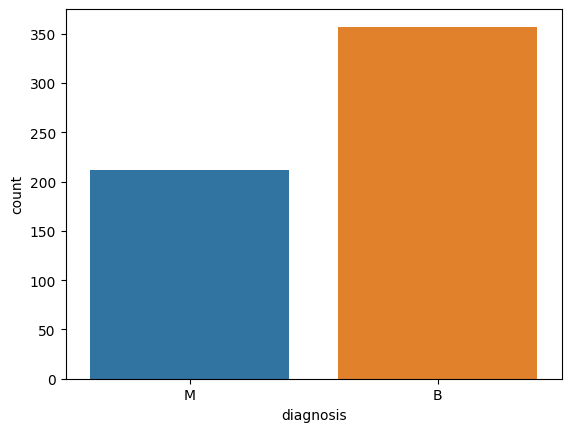

In [39]:
s.countplot(x='diagnosis',data=df1)

<AxesSubplot: xlabel='fractal_dimension_worst', ylabel='count'>

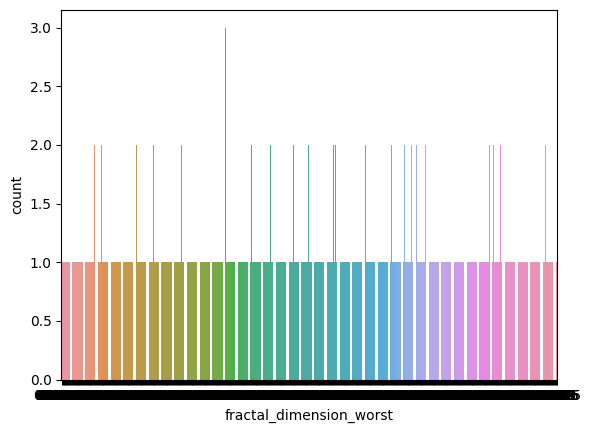

In [40]:
s.countplot(x='fractal_dimension_worst',data=df1)

<AxesSubplot: xlabel='radius_mean', ylabel='count'>

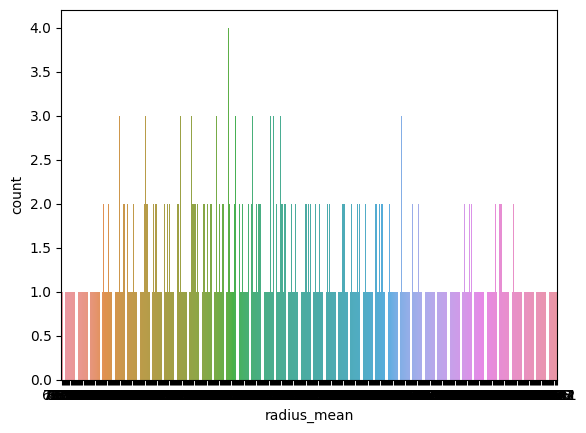

In [41]:
s.countplot(x='radius_mean',data=df1)

<AxesSubplot: >

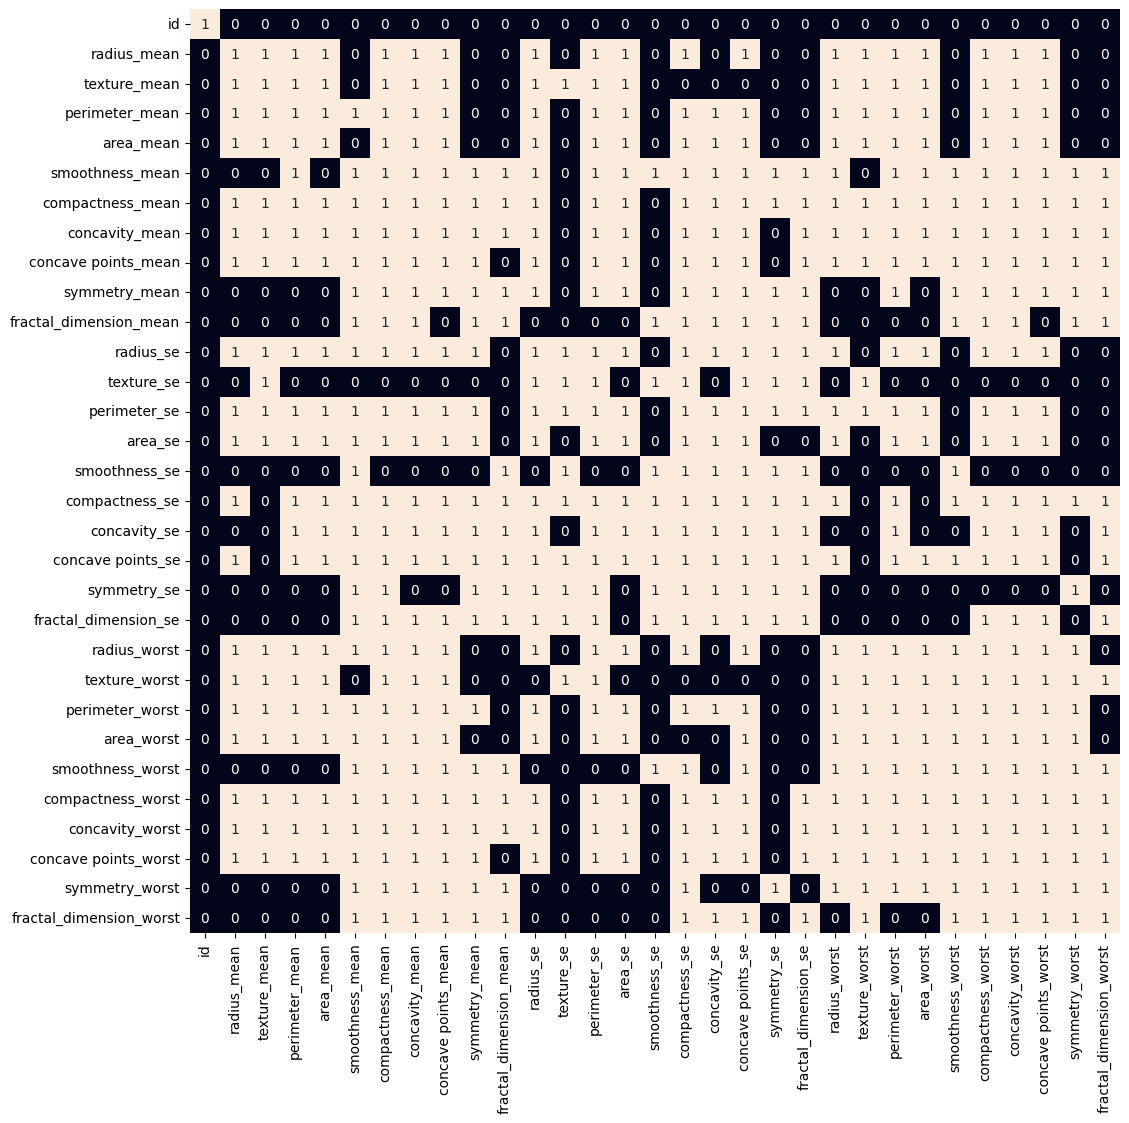

In [42]:
plt.figure(figsize=(12,12))
s.heatmap(df1.corr() > 0.2 , annot=True, cbar=False)

<AxesSubplot: >

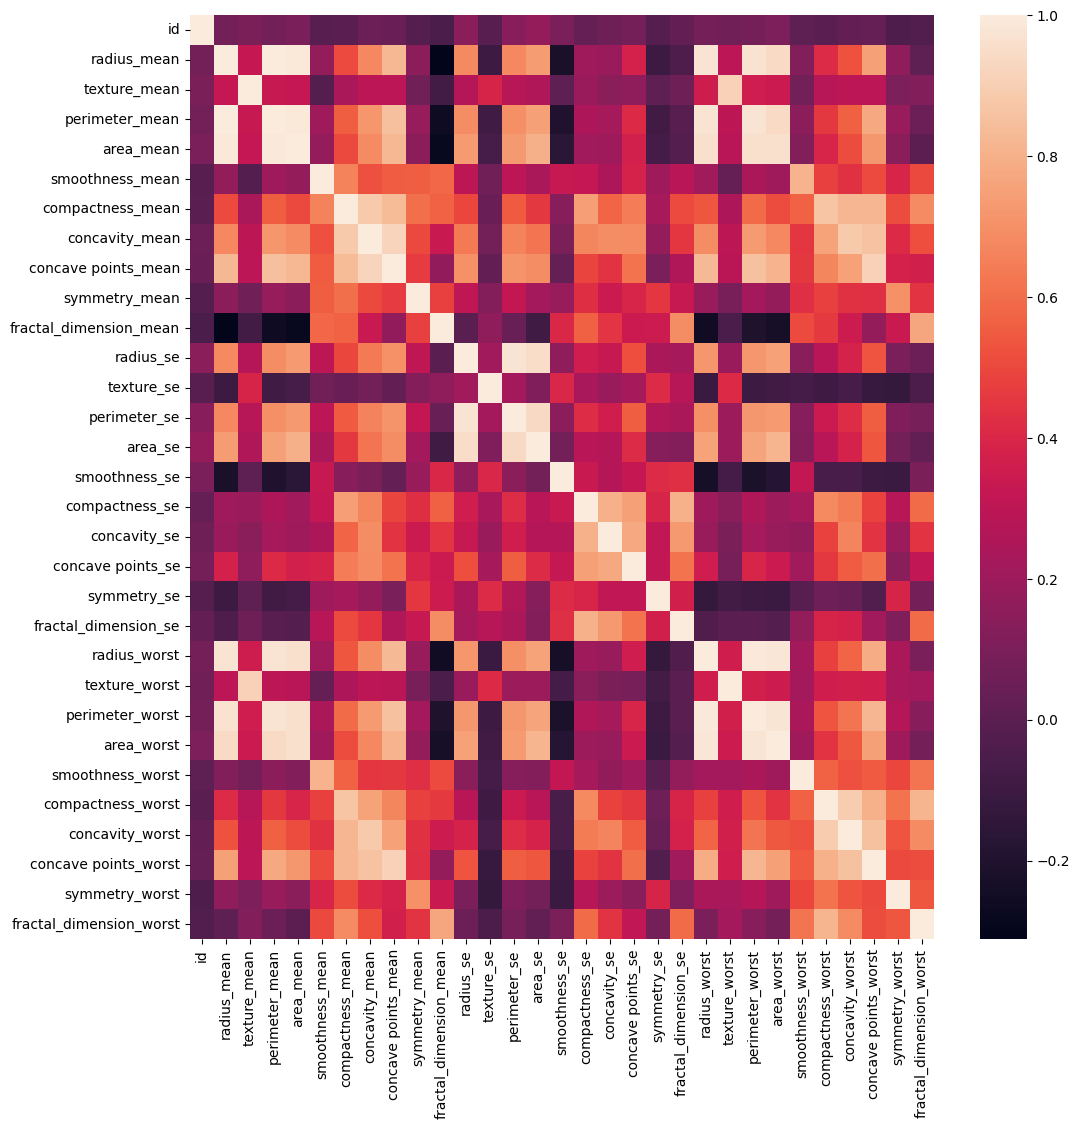

In [43]:
plt.figure(figsize=(12,12))
s.heatmap(df1.corr())

<AxesSubplot: >

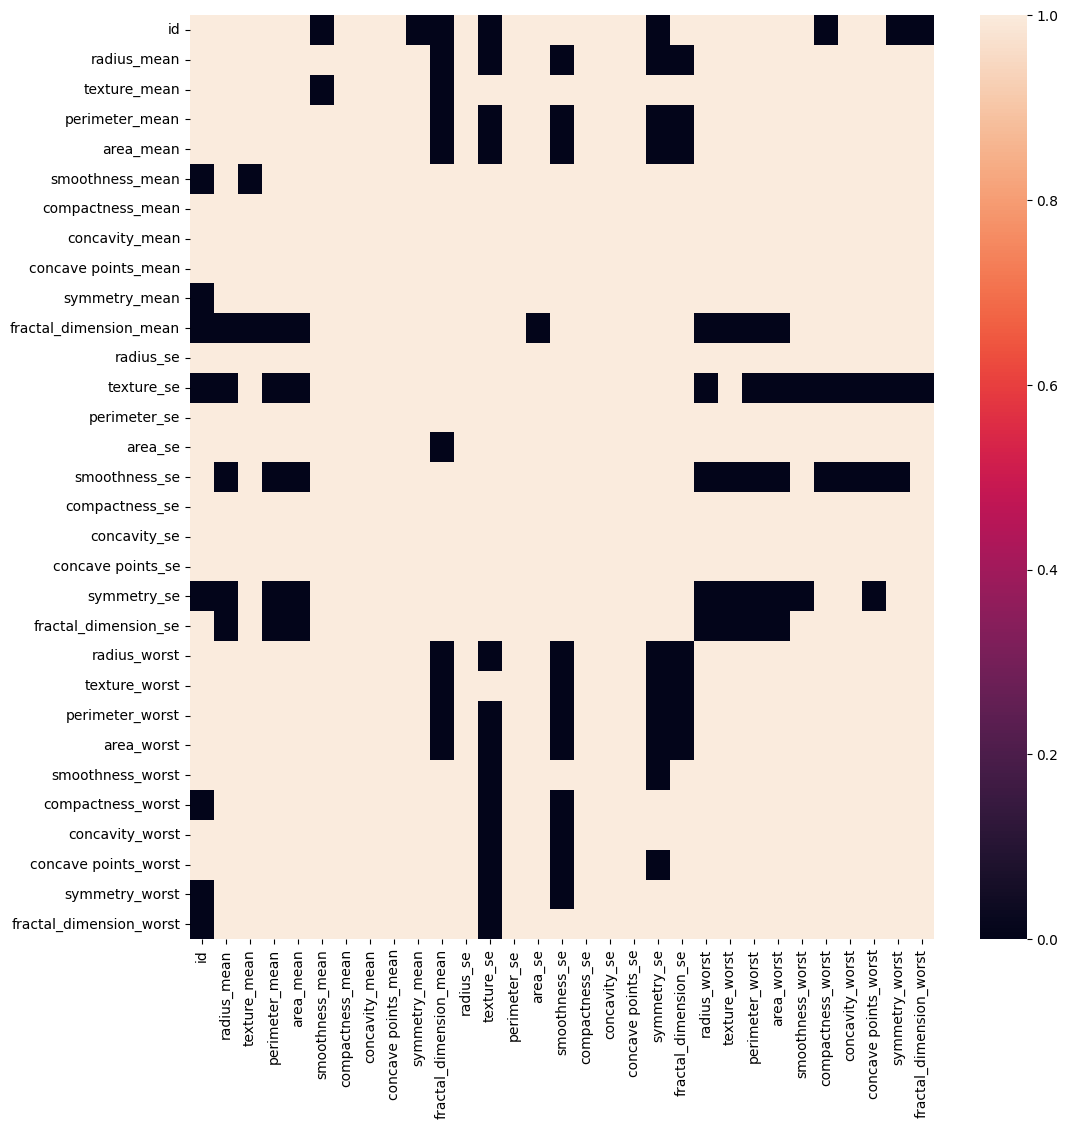

In [44]:
plt.figure(figsize=(12,12))
s.heatmap(df1.corr()>0)

<AxesSubplot: >

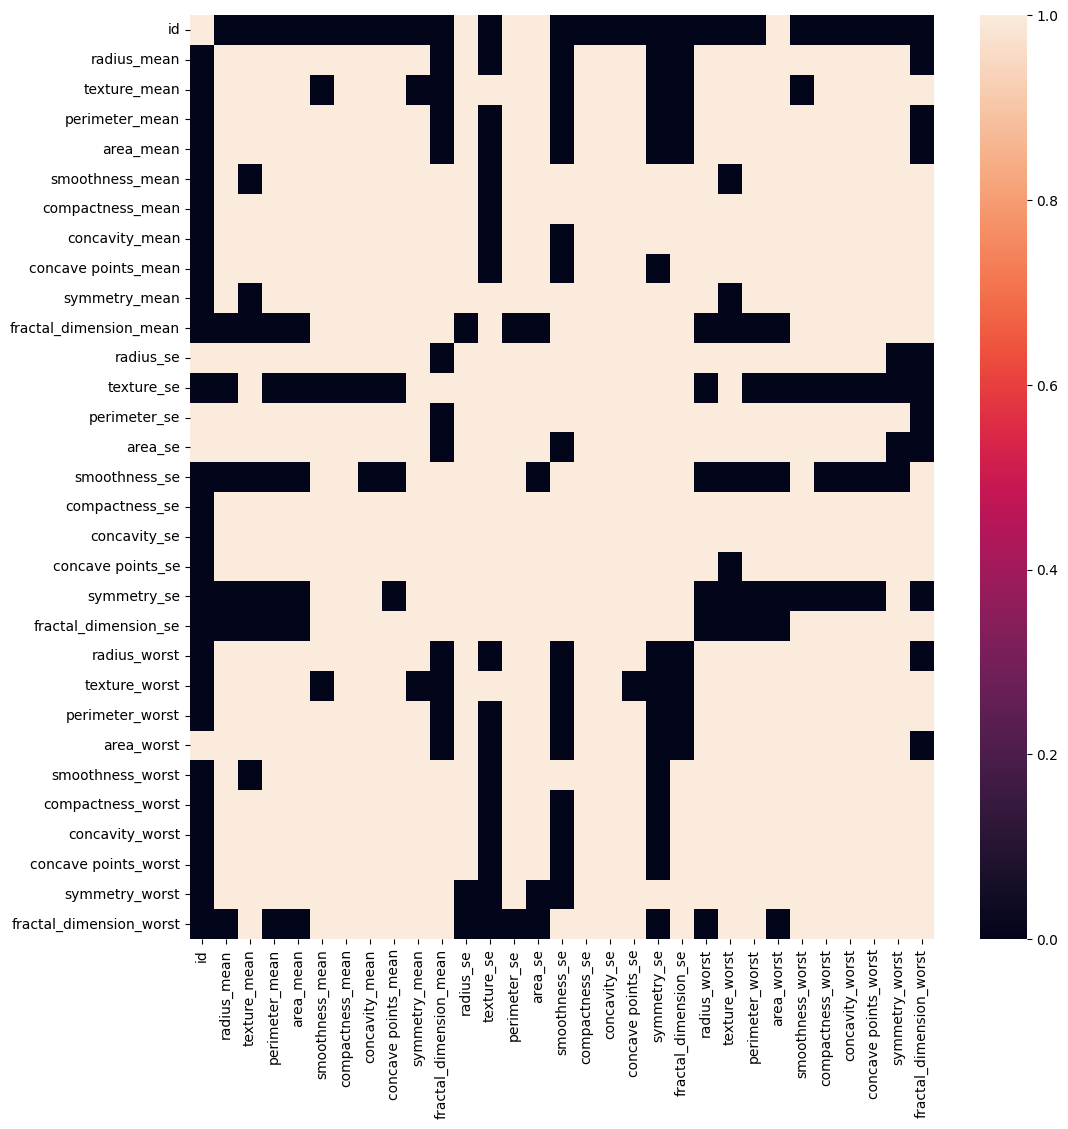

In [45]:
plt.figure(figsize=(12,12))
s.heatmap(df1.corr()>0.1)

<AxesSubplot: >

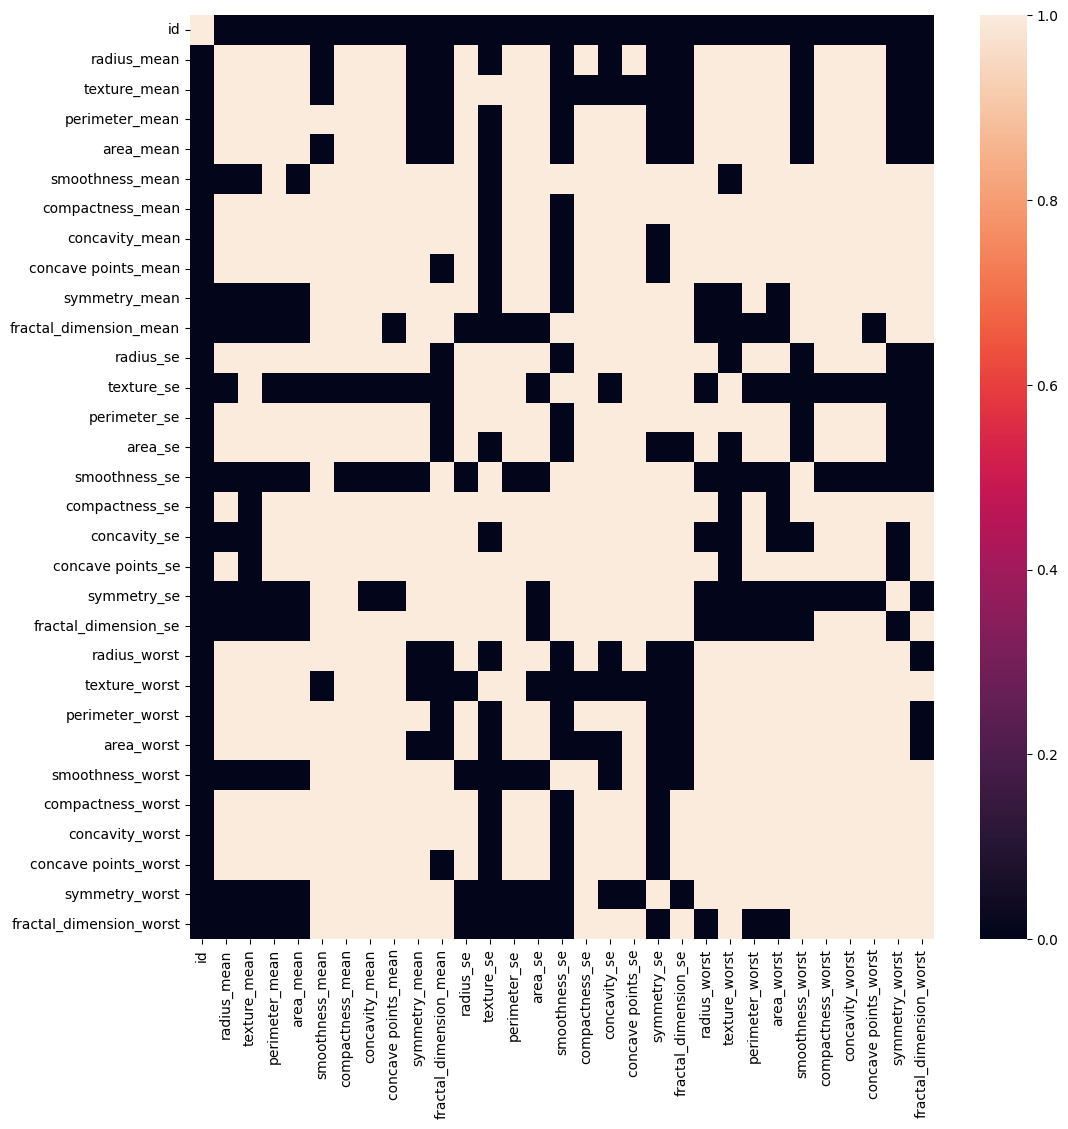

In [46]:
plt.figure(figsize=(12,12))
s.heatmap(df1.corr()>0.2)

<AxesSubplot: >

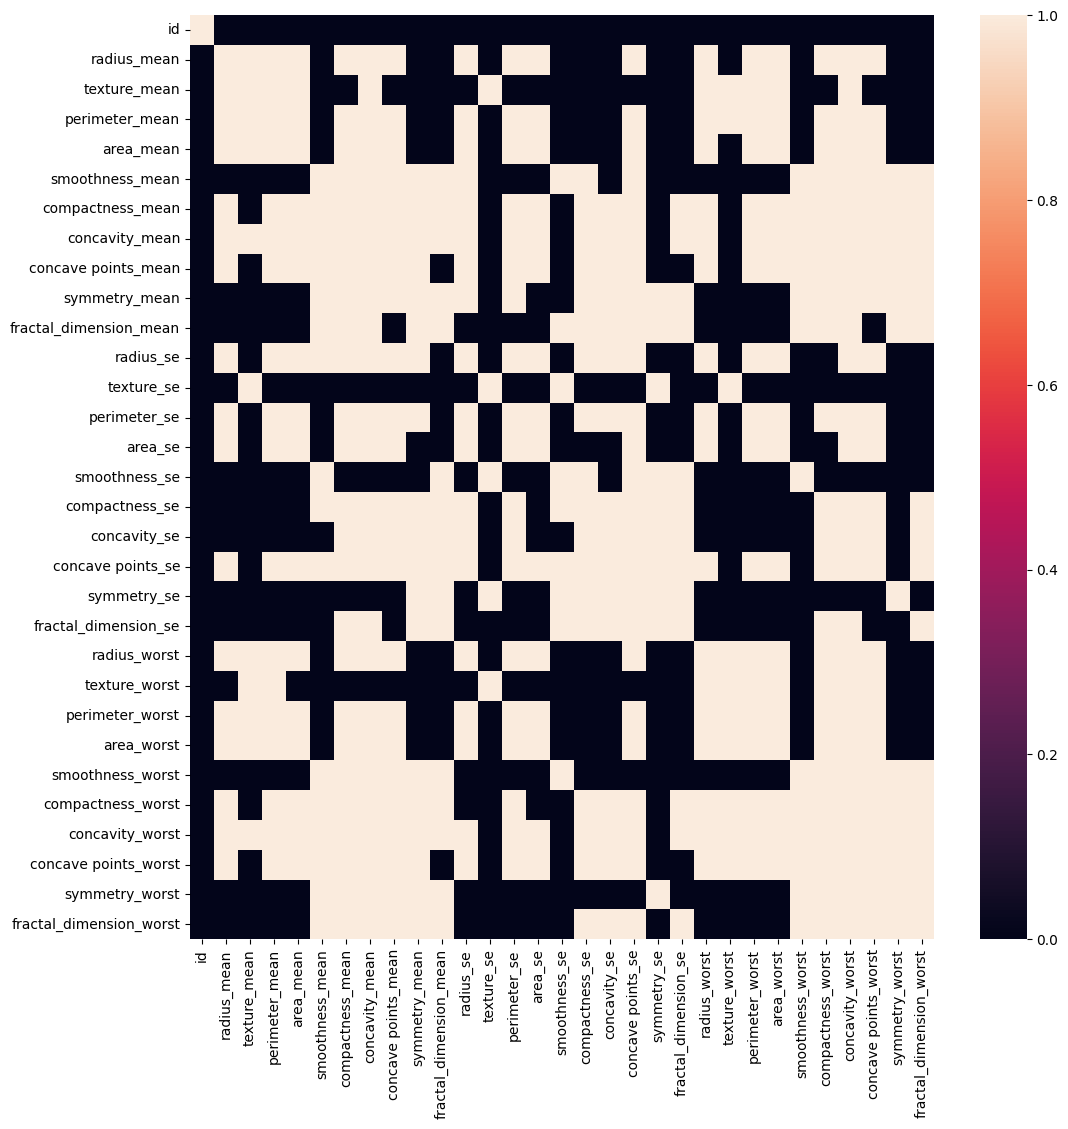

In [47]:
plt.figure(figsize=(12,12))
s.heatmap(df1.corr()>0.3)

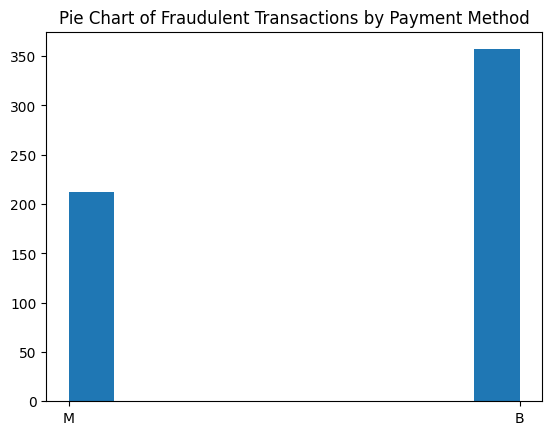

In [48]:
plt.hist(x='diagnosis', data=df1)
plt.title("Pie Chart of Fraudulent Transactions by Payment Method")
plt.show()

In [49]:
X = df1.drop('diagnosis', axis=1)
X.head()
 
Y = df1['diagnosis']
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [50]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [51]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [53]:
X.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [54]:
Y.tail()

564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

In [55]:

Xtrain

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
538,921092,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.000000,0.000000,0.3058,0.09938
384,902727,13.280,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.028640,0.1617,...,14.240,17.37,96.59,623.7,0.11660,0.26850,0.286600,0.091730,0.2736,0.07320
492,914062,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.117000,0.077620,0.2116,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.254400,0.148900,0.3251,0.07625
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.248700,0.149600,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.678000,0.290300,0.4098,0.12840
178,873357,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,...,14.000,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,88649001,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.178400,0.114400,0.1893,...,25.050,36.27,178.60,1926.0,0.12810,0.53290,0.425100,0.194100,0.2818,0.10050
497,914580,12.470,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,...,14.060,24.34,92.82,607.3,0.12760,0.25060,0.202800,0.105300,0.3035,0.07661
55,85759902,11.520,18.75,73.34,409.0,0.09524,0.05473,0.030360,0.022780,0.1920,...,12.840,22.47,81.81,506.2,0.12490,0.08720,0.090760,0.063160,0.3306,0.07036
221,8812818,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,...,14.980,17.13,101.10,686.6,0.13760,0.26980,0.257700,0.090900,0.3065,0.08177


In [56]:
Xtest

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
163,8712064,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,...,13.580,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082
52,857374,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,...,13.100,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408
161,8711803,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.096670,0.1741,...,22.030,17.81,146.60,1495.0,0.1124,0.20160,0.22640,0.17770,0.2443,0.06251
338,897880,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.017750,0.1890,...,11.160,26.84,71.98,384.0,0.1402,0.14020,0.10550,0.06499,0.2894,0.07664
388,903011,11.270,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.027570,0.1810,...,12.040,18.93,79.73,450.0,0.1102,0.28090,0.30210,0.08272,0.2157,0.10430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,9112712,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.010430,0.1621,...,10.670,36.92,68.03,349.9,0.1110,0.11090,0.07190,0.04866,0.2321,0.07211
206,879804,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.019520,0.1934,...,10.420,23.22,67.08,331.6,0.1415,0.12470,0.06213,0.05588,0.2989,0.07380
313,893988,11.540,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,...,12.340,12.87,81.23,467.8,0.1092,0.16260,0.08324,0.04715,0.3390,0.07434
348,898690,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.023220,0.1634,...,12.510,20.79,79.67,475.8,0.1531,0.11200,0.09823,0.06548,0.2851,0.08763


In [57]:
ss = StandardScaler()


In [58]:
Xtrain = ss.fit_transform(Xtrain)

In [59]:
Xtest=ss.fit(Xtest)

In [60]:
Xtest = ss.transform(Xtrain)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
Xtrain

array([[-0.24646363, -1.85862986,  1.45072435, ..., -1.77608789,
         0.23710271,  0.8648913 ],
       [-0.24660074, -0.2512047 , -1.34939439, ..., -0.34687373,
        -0.26648759, -0.61792669],
       [-0.24651612,  1.11848023,  0.27786238, ...,  0.54387273,
         0.5389441 , -0.44517669],
       ...,
       [ 0.38692692, -0.76085491, -0.15274212, ..., -0.79201326,
         0.62496107, -0.77878242],
       [-0.18754549, -0.17012399, -1.30657184, ..., -0.35980568,
         0.24805032, -0.13252752],
       [ 0.37638817, -0.7898123 ,  0.23503983, ...,  2.23593266,
         5.83602587,  5.03467969]])

In [62]:
l = LogisticRegression()


In [63]:
l.fit(Xtrain, Ytrain)

LogisticRegression()

In [64]:
y_predict = l.predict(Xtest)
y_predict

array(['B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B

In [65]:
from sklearn.metrics import accuracy_score

In [67]:
tr = pd.DataFrame({'Algorithm':['Logistic Regression Method']})

In [68]:
rt=pd.concat([tr,tr])

In [69]:
rt=tr['Algorithm']

In [70]:
rt

0    Logistic Regression Method
Name: Algorithm, dtype: object

In [71]:
dc=DecisionTreeClassifier()

In [72]:
dc.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [73]:
y_predict=dc.predict(Xtest)

In [74]:
tr = pd.DataFrame({'Algorithm': ['Decision tree Classifier Method']})

In [75]:
svc=SVC()

In [76]:
svc.fit(Xtrain,Ytrain)
y_predict=svc.predict(Xtest)
y_predict

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [77]:
rc = RandomForestClassifier()
rc.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [78]:
y_predict=rc.predict(Xtest)

In [79]:
y_predict

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B